# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

В нашем распрояржении датасет сервиса Яндекс.недвижимость - выгрузка архива объявлений за несколько лет о продаже квартир в городе Санкт-Петербург и близких к нему городов. Нашей целью является изучение данных для нахождения закономерностей. Нам предстоит изучить как бсытро продавались квартиры в течение лет, определить какие из признаков больше всего влияют на итоговую стоимость, посчитать среднюю стоимость квадратного метра в 10 городо по количеству выставленных объявлений, пронаблюдать как расстояние до центра Санкт-Петербурга влияет на стоимость квартир.

**Ход исследования**
Данные о недвижимости лежать в файле `/datasets/real_estate_data.csv`.

Мы ничего не знаем о качестве данных, поэтому в обызательном порядке будет выполнена предобработка данных. Проверим столбцы на наличие пропусков, выбросов и аномалий, явных и неявных дубликатов и попробуем с ними разобраться, чтобы привести значения к рабочему виду.

Исследование пройдет в 8 этапов:
- Обзор данных.
- Предобработка данных.
- Расчет и добавление новых признаков в датафрейм.
- Анализ стоимости квартир в Ленинградской области.
- Ликвидноть такого актива как недвижимость в Ленинградской области с течением времени.
- Анализ влияния известных признаков на итоговую стоимость
- Анализ стоимости квартир в Санкт-Петербурге.
- Подведение итогов и написание выводов.


### Откройте файл с данными и изучите общую информацию. 

Перенес описание датафрейма, для быстрого доступа.
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

In [1]:
# импортируем бибку пандас
import pandas as pd

In [2]:
# загружаем датафрейм в переменную data
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# выводим первые 5 строк датафрейма
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# выводим общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Все не так печально как может показаться н первый взгляд,хоть и кажется, что пропусков очень много, в основном пропуски встречаются в таких столбцах(далее признаках/столбцах) как:
- `balcony` - наличие балкона
- `is_apartment` 
их легко заполнить, так как скорее всего если у квартиры нет балкона продавец может явно указать что его нет, ЛИБО не указать это вовсе

По этому многие пропуски можно будет закрыть пустой строкой, нулем или False

In [5]:
# выводим описательную статистику о количественных признаках
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
# выводим описательную статистику о категориальных признаках
data.describe(include='object')

,first_day_exposition,is_apartment,locality_name
count,23699,2775,23650
unique,1491,2,364
top,2018-02-01T00:00:00,False,Санкт-Петербург
freq,368,2725,15721


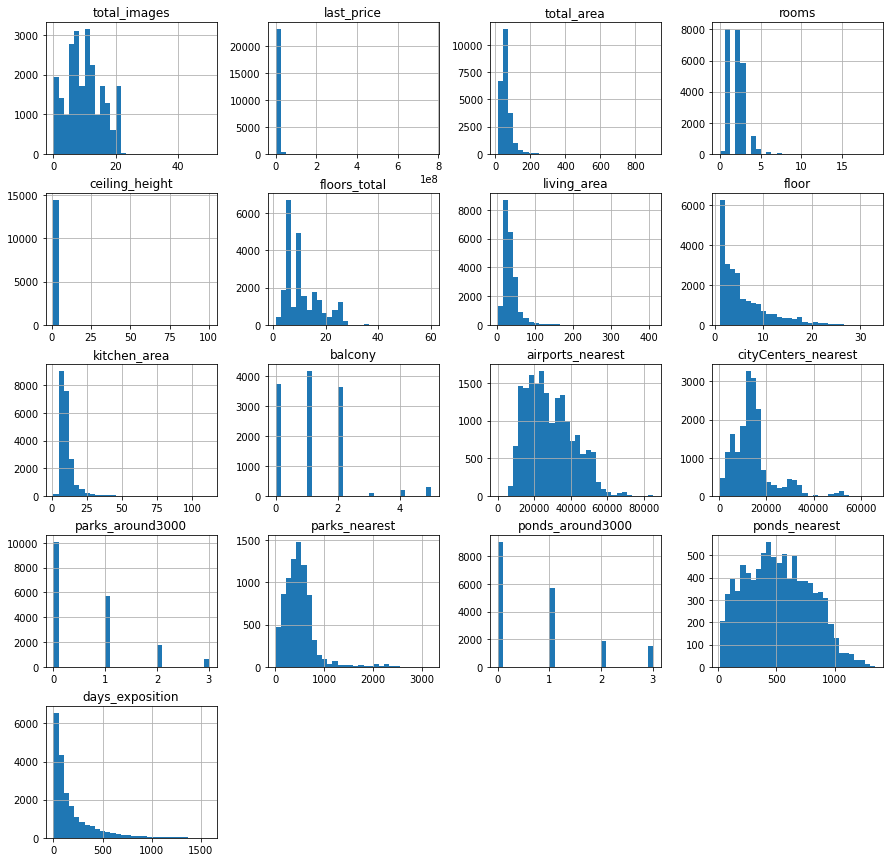

In [7]:
data.hist(figsize=(15,15), bins = 30);

Cитуация неоднозначная, на первый взгляд придется повозиться с выбросами

In [8]:
# data.total_images.max() 

**Выводы по первому пункту**

Краткий осмотр данных показал:
- в данных есть пропуски, с ними нужно будет разобраться
- возможно есть ошибки, их нужно будет исправить
- нужно будет разобраться с выбросами

Объем данных хорооший, пропусков в важных признака мало, на исследование это никак не должно повлиять

### Предобработка данных

#### обрабатываем пропуски

In [9]:
# оценим масщтабы проблемы
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**ceiling_height**

Убираем потолок 100 м, потому что даже 10м потолок не может существовать, поэтому удаляем

А также убираем потолки высотой 6..24 м, потому что точно ошибка, так как у них и не обрезать один порядок и особо ничего не сделать

In [11]:
      
#data.ceiling_height.sort_values(ascending=False)
data = data.loc[(data['ceiling_height'] < 6)|((data['ceiling_height'] >=24)&(data['ceiling_height'] != 100)) | data['ceiling_height'].isna()] 
# data.ceiling_height.sort_values(ascending=False)

data.loc[data['ceiling_height'] > 23, 'ceiling_height'] = data['ceiling_height']/10

#data.plot(y='ceiling_height',kind='hist', bins = 100, range=(0,5))

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [12]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].isna().sum()

0

**floors_total**

Думаю эти пропуски можно оставить, потому что это не самая важная информация для выбора квартиры

Почему они отсутствуют, не совсем понятно

In [13]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Удалим пропуски, потому что дальше из-за этого возникает ошибка при приведении к типу int

In [14]:
data = data.dropna(subset=['floors_total'])

**living_area**

Непонятно, по идее это один из самых важных признаков

**is_apartment**

Тут пропуски скорее всего появились по той присине, что эти предложения не апартаменты, поэтому это и не отмечали.

Еще в info видно, что тип данных `object`, но в таблице написано `False\True`

**kitchen_area**

наверное это не так важно, возможно многие пересекаются с пропусками в living_area, значит можно будет удалить и то и то


**balcony**

In [16]:
    
data['balcony'] = data['balcony'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment            20830
studio                      0
open_plan                   0
kitchen_area             2229
balcony                     0
locality_name              48
airports_nearest         5531
cityCenters_nearest      5508
parks_around3000         5507
parks_nearest           15563
ponds_around3000         5507
ponds_nearest           14546
days_exposition          3171
dtype: int64

**locality_name**

Сложно понять природу происхождения пропусков, потому что вроде бы все остальные данные у строчек с пропусками в этом признаке в порядке, поэтому логично было бы удалить эти строчки, но в задании написнао их оставить, поэтому  🤷

In [17]:
data.loc[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,2.65,4.0,42.60,2,NaN,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,2.65,24.0,15.60,3,NaN,...,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,2.65,24.0,33.10,21,NaN,...,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,2.65,5.0,30.80,5,NaN,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,2.65,7.0,NaN,6,NaN,...,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,2.65,7.0,59.10,5,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,2.65,24.0,20.00,23,NaN,...,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Вернулся из будущего, в дальнейшем эти пропуски создадут проблемы при удалении неявных дубликатов, поэтому я решил убрать неколько этих объявлений

In [18]:
data.shape

(23603, 22)

In [19]:
data = data.dropna(subset=['locality_name'])
data.shape

(23555, 22)

**airports_nearest**

In [20]:
   
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20797
studio                      0
open_plan                   0
kitchen_area             2220
balcony                     0
locality_name               0
airports_nearest         5523
cityCenters_nearest      5500
parks_around3000         5499
parks_nearest           15530
ponds_around3000         5499
ponds_nearest           14523
days_exposition          3170
dtype: int64

Пропуски могут быть связаны с тем, что аэропорт находится так далеко, что даже смысла указывать расстояние нет

**cityCenters_nearest**

Хотелось бы сказать, что причина схожа с предыдущим признаком, но вряд ли может быть такое, что у города в котором расположено предложение отсутствует центр)

Поэтому причина необъяснима

**parks_around3000**

Пропуск обусловлен тем, что в пределах 3км нет парков)

In [21]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

**parks_nearest**

In [22]:
data.loc[data['parks_nearest'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,NaN,...,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000.0,44.00,2018-08-27T00:00:00,2,2.65,5.0,31.00,4,False,...,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,0.0,NaN,NaN,NaN,90.0
14,1,4400000.0,36.00,2016-06-23T00:00:00,1,2.65,6.0,17.00,1,NaN,...,8.00,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0
17,6,4180000.0,36.00,2016-09-09T00:00:00,1,2.65,17.0,16.50,7,NaN,...,11.00,1.0,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0


В таблице пропуски в тех строках, где встречается 0 у признака parks_around3000, значит, что рядом нет парка)

**ponds_around3000**

Ситуация для двух следующих признаков похожа на ситуацию с парками. их  просто нет рядом

In [23]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [24]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20797
studio                      0
open_plan                   0
kitchen_area             2220
balcony                     0
locality_name               0
airports_nearest         5523
cityCenters_nearest      5500
parks_around3000            0
parks_nearest           15530
ponds_around3000            0
ponds_nearest           14523
days_exposition          3170
dtype: int64

**ponds_nearest**

Рядом нет прудов        

**days_exposition**

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

С этими пропусками тоже особо ничего не сделать, потому что скорее всего объявление еще не было снято

Итого имеем такую картину:

In [25]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20797
studio                      0
open_plan                   0
kitchen_area             2220
balcony                     0
locality_name               0
airports_nearest         5523
cityCenters_nearest      5500
parks_around3000            0
parks_nearest           15530
ponds_around3000            0
ponds_nearest           14523
days_exposition          3170
dtype: int64

#### **Меняем тип данных**

In [26]:
# Смотрим на типы данных колонок
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [27]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Точно нужно поменять тип данных в 

`first_day_exposition` потому что это дата

`is_apartment` потому что должен быть булев тип

`balcony` потому что не может быть 1.5 балкона(:

`floors total` не можеть 1.5 этажа в доме

In [28]:
data['floors_total'].max()

60.0

In [29]:
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype(bool)
data['balcony'] = data['balcony'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)

In [30]:
# проверяем что изменения принялись
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### **Убираем дубликаты**

In [31]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,True,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [32]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [33]:
data.shape

(23555, 22)

In [34]:
# производим поиск явных дубликатов
data[data.duplicated()].shape


(0, 22)

Результат говорит о том, что явных дубликатов нет

Поищем неяные пропуски

Дубликаты могут быть только по признаку locality_name

In [35]:

#data.locality_name.unique()


В датафрейме встречаются вариации поселок, посёлок, деревня, ""(пустая тсрока) для одного и того же поселения, поэтому считаю разумным убрать эти префиксы в виде характеристики поселения и оставить только сами названия

In [36]:
def repl(name, what_replace, for_what):
    return name.replace(what_replace, for_what)

In [37]:
data['locality_name'] = data['locality_name'].apply(repl, args=('поселок ', 'посёлок '))
data['locality_name'] = data['locality_name'].apply(repl, args=('городской посёлок ', 'посёлок городского типа '))
data['locality_name'] = data['locality_name'].apply(repl, args=('посёлок городского типа ', 'посёлок '))


In [38]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок Ефимовский', 'посёлок Плодовое', 'деревня Заклинье',
       'посёлок Торковичи', 'посёлок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

#### устранение выбросов

<AxesSubplot:>

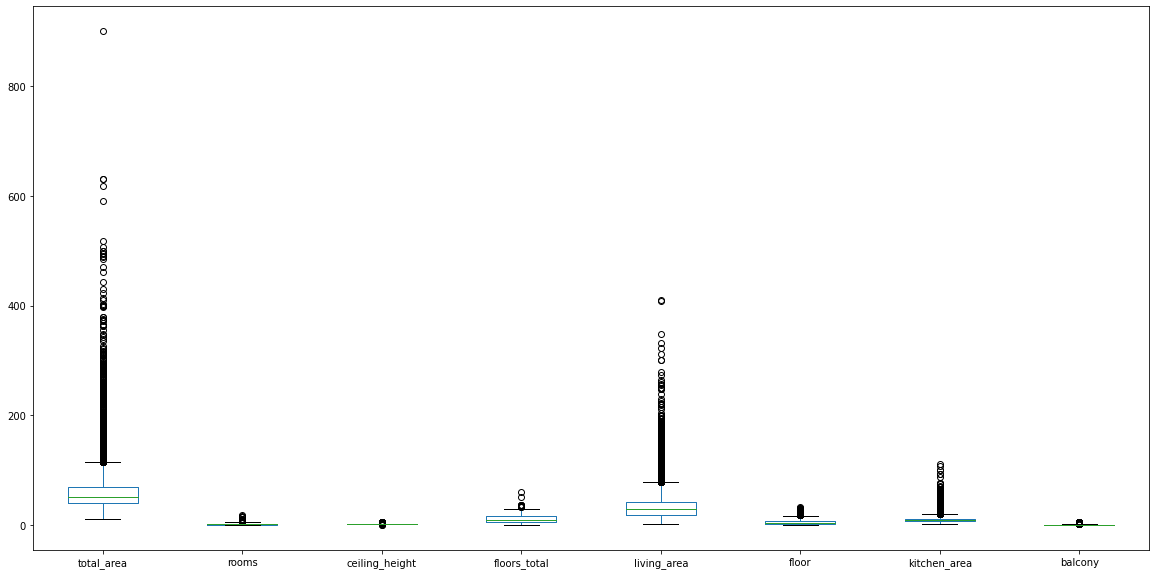

In [39]:
data.loc[:,'total_area':'balcony'].plot(kind='box', figsize=(20,10))


Ящик с усами показывает большое количество выбросов почти в каждом признаке

In [40]:
inds = data.describe().columns
inds

Index(['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height',
       'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony',
       'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest',
       'days_exposition'],
      dtype='object')

In [41]:
# заменяем ручками выбросы на граничные значения
for ind in inds:
    q1 = data[ind].quantile(.25)
    q3 = data[ind].quantile(.75)
    iqr = q3-q1
    
    low_bound = max(q1-1.5*iqr, 0)
    high_bound = q3+ 1.5*iqr
    data.loc[data[ind]>high_bound,ind] = high_bound
    data.loc[data[ind]<low_bound,ind] = low_bound

Пытался заменить выбросы на медину, и на крайние значения, но при замене на медиану остаются некоторые выбросы и сильно много становится медианных значений, а при замене на границы, получается, что распределения меняются немного, так как начинают перевешивать границы(это стало ясно из-за пункта с построением гистограмм) хотел их просто удалить, но возникают проблемы с этим

In [42]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20.0,11875000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,True,...,19.5,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7.0,3350000.0,40.40,2018-12-04,1.0,2.65,11.0,18.6,1.0,True,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4.0,True,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,510.0
3,0.0,11875000.0,114.25,2015-07-24,3.0,2.65,14.0,NaN,9.0,True,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,2.5,234.0,424.0
4,2.0,10000000.0,100.00,2018-06-19,2.0,2.85,14.0,32.0,13.0,True,...,19.5,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<AxesSubplot:>

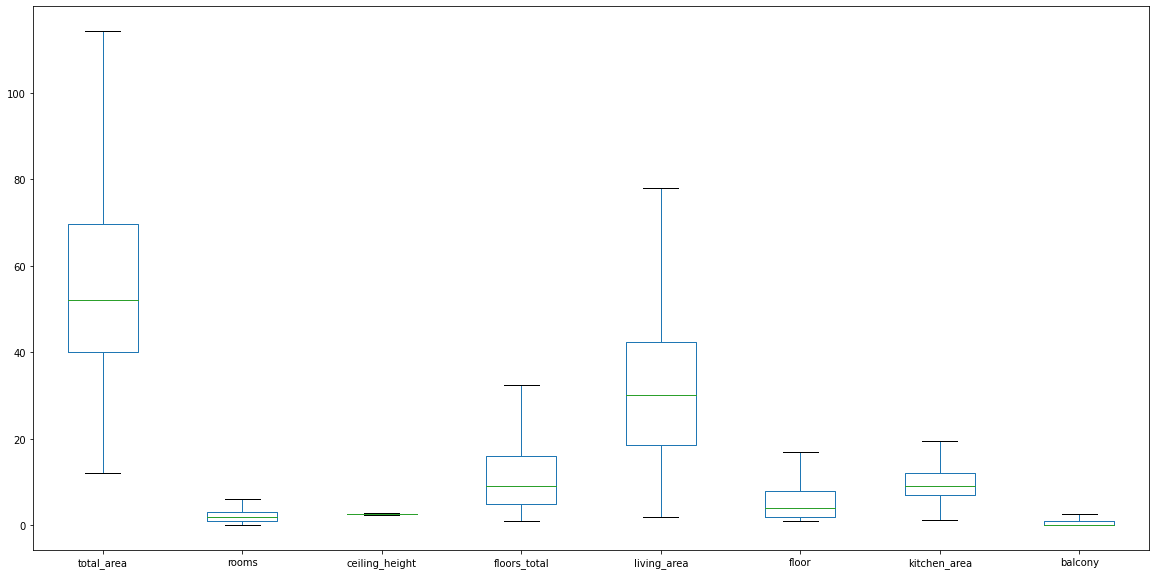

In [43]:
data.loc[:,'total_area':'balcony'].plot(kind='box', figsize=(20,10))
# как видим все выбросы были убраны

Устранили аномалии, путем замены на крайние значения

**Вывод**

Перед началом работы, качество данных было далеко не самым лучшим, были пропуски, выбросы и аномалии, ошибки, неправильные типы данных у признаков, но со всем этим разобрались. Пропуски либо заполнили, либо удалили. Выбросы устранили путем замены на допустимые граничные значения.

Теперь значения имеют рабочий вид, можно считать новые признаки и проводить исследование.

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавляем цену квадратного метра

In [44]:
data['price_per_meter'] = round(data['last_price']/data['total_area'],2)

In [45]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
0,20.0,11875000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,True,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,109953.70
1,7.0,3350000.0,40.40,2018-12-04,1.0,2.65,11.0,18.6,1.0,True,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4.0,True,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,510.0,92785.71
3,0.0,11875000.0,114.25,2015-07-24,3.0,2.65,14.0,NaN,9.0,True,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,2.5,234.0,424.0,103938.73
4,2.0,10000000.0,100.00,2018-06-19,2.0,2.85,14.0,32.0,13.0,True,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


#### Добавляем день недели выставления объявления

In [46]:
# добавляем день недели, где 1 - понедельник, 2 - вторник и т.д.
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday'] += 1

In [47]:
data['weekday'].unique()

array([4, 2, 5, 1, 3, 7, 6])

#### Добавляем месяц выставления объявления

In [48]:
data['month'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month
0,20.0,11875000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,True,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,109953.70,4,3
1,7.0,3350000.0,40.40,2018-12-04,1.0,2.65,11.0,18.6,1.0,True,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,2,12
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4.0,True,...,21741.0,13933.0,1.0,90.0,2.0,574.0,510.0,92785.71,4,8
3,0.0,11875000.0,114.25,2015-07-24,3.0,2.65,14.0,NaN,9.0,True,...,28098.0,6800.0,2.0,84.0,2.5,234.0,424.0,103938.73,5,7
4,2.0,10000000.0,100.00,2018-06-19,2.0,2.85,14.0,32.0,13.0,True,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,2,6


#### Добавляем год выставления объявления

In [49]:
data['year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year
0,20.0,11875000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,True,...,16028.0,1.0,482.0,2.0,755.0,NaN,109953.70,4,3,2019
1,7.0,3350000.0,40.40,2018-12-04,1.0,2.65,11.0,18.6,1.0,True,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,2,12,2018
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4.0,True,...,13933.0,1.0,90.0,2.0,574.0,510.0,92785.71,4,8,2015
3,0.0,11875000.0,114.25,2015-07-24,3.0,2.65,14.0,NaN,9.0,True,...,6800.0,2.0,84.0,2.5,234.0,424.0,103938.73,5,7,2015
4,2.0,10000000.0,100.00,2018-06-19,2.0,2.85,14.0,32.0,13.0,True,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,2,6,2018


#### Добавляем тип этажа квартиры

In [50]:
data['type_floor'] = data['floor']
data['type_floor'] = data['type_floor'].where(data['type_floor']!=1.0,'Первый')
data['type_floor'] = data['type_floor'].where(data['type_floor']!=data['floors_total'], 'Последний')
data['type_floor'] = data['type_floor'].where((data['type_floor']=='Первый')|(data['type_floor']=='Последний'), 'Другое')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,type_floor
0,20.0,11875000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,True,...,1.0,482.0,2.0,755.0,NaN,109953.70,4,3,2019,Другое
1,7.0,3350000.0,40.40,2018-12-04,1.0,2.65,11.0,18.6,1.0,True,...,0.0,NaN,0.0,NaN,81.0,82920.79,2,12,2018,Первый
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4.0,True,...,1.0,90.0,2.0,574.0,510.0,92785.71,4,8,2015,Другое
3,0.0,11875000.0,114.25,2015-07-24,3.0,2.65,14.0,NaN,9.0,True,...,2.0,84.0,2.5,234.0,424.0,103938.73,5,7,2015,Другое
4,2.0,10000000.0,100.00,2018-06-19,2.0,2.85,14.0,32.0,13.0,True,...,2.0,112.0,1.0,48.0,121.0,100000.00,2,6,2018,Другое


#### Добавляем расстояние до центра в км

In [51]:
data['cityCenters_km'] = data['cityCenters_nearest']//1000
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,type_floor,cityCenters_km
0,20.0,11875000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,True,...,482.0,2.0,755.0,NaN,109953.70,4,3,2019,Другое,16.0
1,7.0,3350000.0,40.40,2018-12-04,1.0,2.65,11.0,18.6,1.0,True,...,NaN,0.0,NaN,81.0,82920.79,2,12,2018,Первый,18.0
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4.0,True,...,90.0,2.0,574.0,510.0,92785.71,4,8,2015,Другое,13.0
3,0.0,11875000.0,114.25,2015-07-24,3.0,2.65,14.0,NaN,9.0,True,...,84.0,2.5,234.0,424.0,103938.73,5,7,2015,Другое,6.0
4,2.0,10000000.0,100.00,2018-06-19,2.0,2.85,14.0,32.0,13.0,True,...,112.0,1.0,48.0,121.0,100000.00,2,6,2018,Другое,8.0


### Проведите исследовательский анализ данных

#### Изучаем параметры объектов

In [52]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_meter', 'weekday',
       'month', 'year', 'type_floor', 'cityCenters_km'],
      dtype='object')

In [53]:
needed_cols = ['total_area','living_area', 'kitchen_area','last_price','rooms','ceiling_height','floor','floors_total','cityCenters_nearest','airports_nearest','parks_nearest','weekday','month']
df = data[needed_cols]
df.dtypes

total_area             float64
living_area            float64
kitchen_area           float64
last_price             float64
rooms                  float64
ceiling_height         float64
floor                  float64
floors_total           float64
cityCenters_nearest    float64
airports_nearest       float64
parks_nearest          float64
weekday                  int64
month                    int64
dtype: object

**type_floor**

In [54]:
data['type_floor'].value_counts()

Другое       17489
Последний     3158
Первый        2908
Name: type_floor, dtype: int64

Начнем с `type_floor`, потому что это единственный признак типа object. этажи отличные от первого и последнего встречаются в 3 раза чаще, чтодостаточно интересно, потому что дома могут иметь разное количество этпжей, 5, 9, 10 и тд

Посмотрим с чем это связано, когда будем строить распределние общего количества этажей в доме.

<AxesSubplot:>

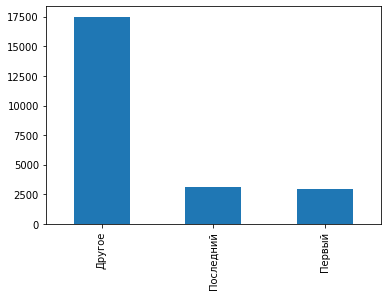

In [55]:
data['type_floor'].value_counts().plot(kind='bar')

**total_area**

<AxesSubplot:title={'center':'total_area'}, ylabel='Frequency'>

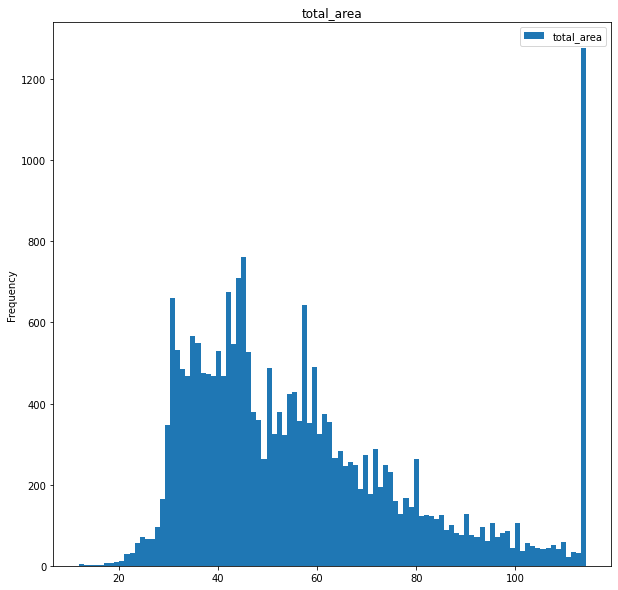

In [56]:
name = 'total_area'
data.plot(kind='hist', y=name, bins = 100, title=name,figsize=(10,10))

На правый всплеск количества значений не обращаем, он будет везде, так как мы заменяи выбросы на верхнюю границу

Большая часть предложений имеет общую площадь 30-70 квадратных метров, после 80, счет идет на сотни

**living_area**

<AxesSubplot:title={'center':'living_area'}, ylabel='Frequency'>

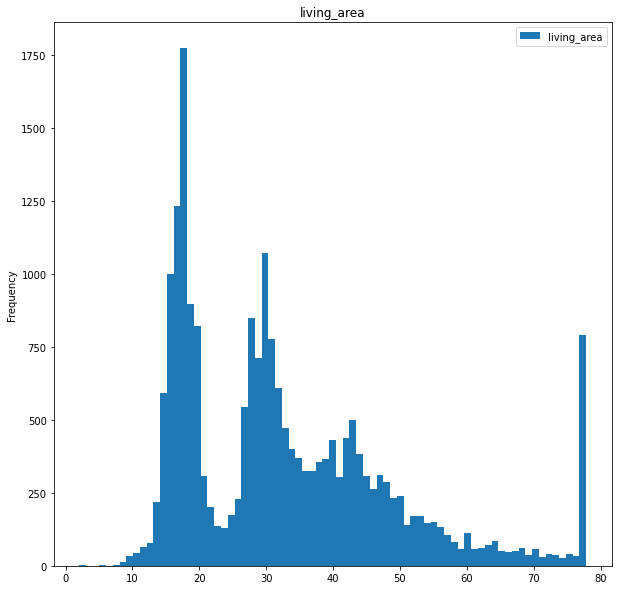

In [57]:
name = 'living_area'
data.plot(kind='hist', y=name, bins = 75, title=name, figsize=(10,10))

в это же время жилая площадь в большинстве предложений равна 15-20 и ~26-50, что сильно отличается от total_area

связано может быть с балконами, кухнями или какими-то такими пространствами

**kitchen_area**

<AxesSubplot:title={'center':'kitchen_area'}, ylabel='Frequency'>

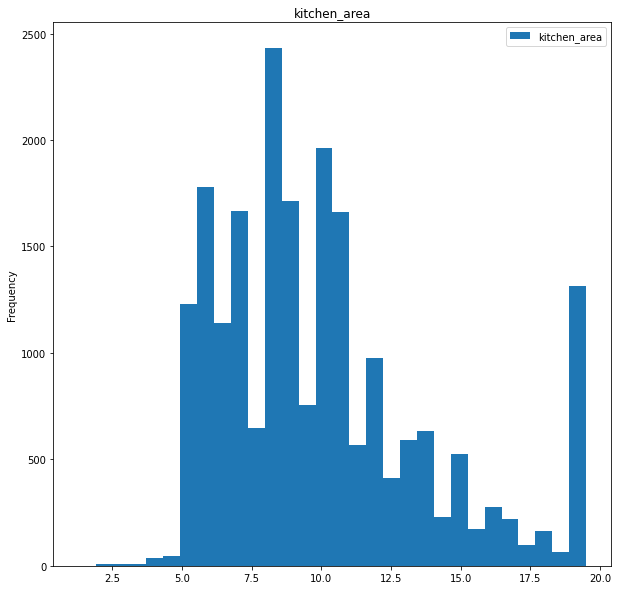

In [58]:
name = 'kitchen_area'
data.plot(kind='hist', y=name, bins = 30, title=name, figsize=(10,10))

Кухни в основном имеют площадь от 5 до 12.5, значит они 

**last_price**

<AxesSubplot:title={'center':'last_price'}, ylabel='Frequency'>

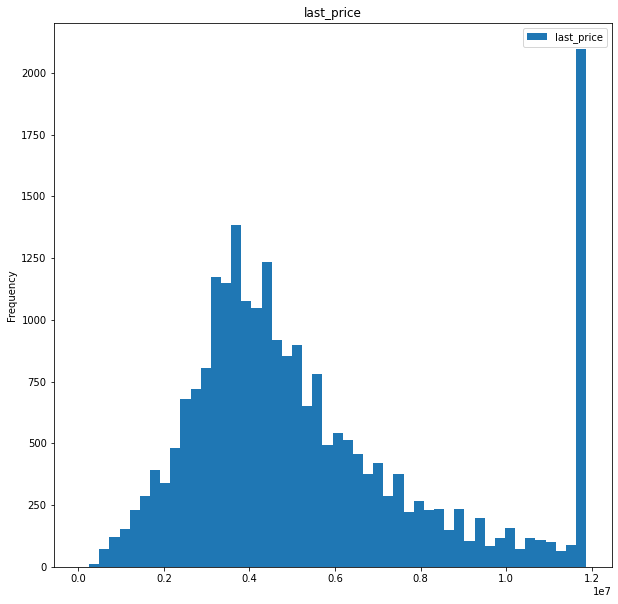

In [59]:
name = 'last_price'
data.plot(kind='hist', y=name, bins = 50, title=name, figsize=(10,10))

Цена имеет почти нормальное распределение, и болшое количество предложений скопилось около отметки 4млн

**rooms**

<AxesSubplot:title={'center':'rooms'}, ylabel='Frequency'>

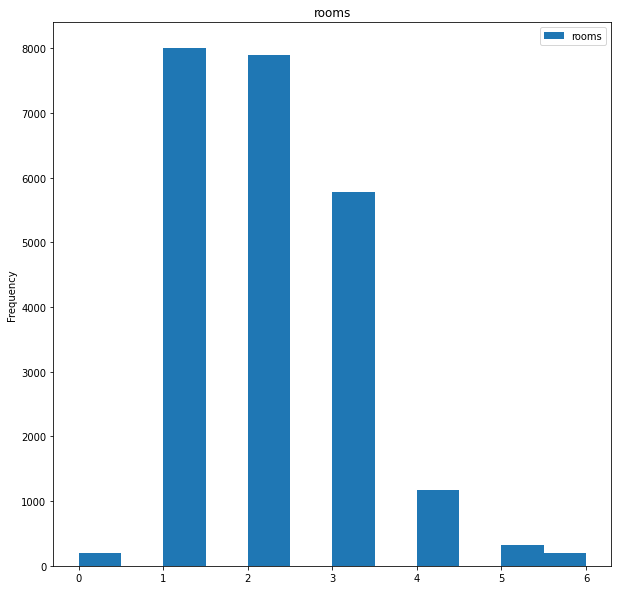

In [60]:
name = 'rooms'
data.plot(kind='hist', y=name, bins = 12, title=name, figsize=(10,10))

В основном на продажу выставляют одно-, двух-, трех- комнатные квартиры, но встречаются, даже пяти- и шести- комнатные
Интересно, какую площадь имеют эти квартиры если сгруппировать их по комнатам

<AxesSubplot:xlabel='rooms'>

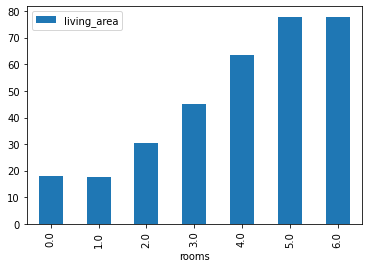

In [61]:
df = data.pivot_table(index='rooms', values='living_area', aggfunc=('median'))
df.plot(kind='bar', y='living_area')

Для упрощения описания и предотвращения многочисленного повтора слова комнатные, будем писать 1, 2, 3, что значит, однокомнатные и тд квартиры

Студии имеют примерно такую же площадь жилую как и 1 квартиры. 2, 3, 4 . Отличаются площадью на 15м^2, что скорее всего значит, что добавочные комнаты именно такого размера. При этом, я проверил, этот факт не отличаетс для среднего и медианы. 5 и 6 квартиры же имеют в основном одинаковую площадь.

**ceiling_height**

<AxesSubplot:title={'center':'ceiling_height'}, ylabel='Frequency'>

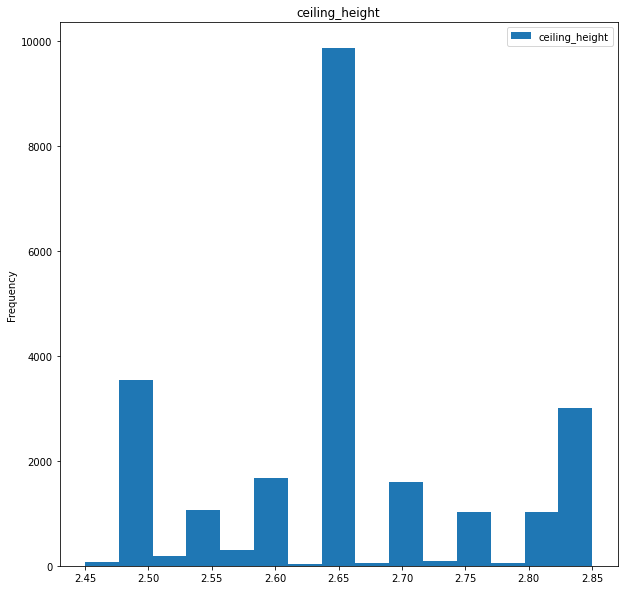

In [62]:
name = 'ceiling_height'
data.plot(kind='hist', y=name, bins = 15, title=name, figsize=(10,10))

Значительное число квартир имеют высоту потолков 2.65м. Но потолки бывают и 2.45м и 2.85.

В интернете прочитал интересный факт, что квартиры обязаны иметь высоту потолка минимум 2.4м, поэтому неудивительно, что меньше нам и не встретилось.

**floor**

<AxesSubplot:title={'center':'floor'}, ylabel='Frequency'>

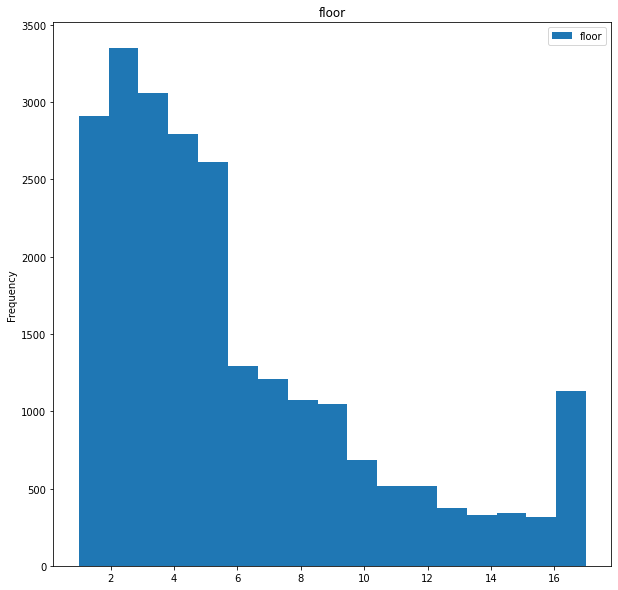

In [63]:
name = 'floor'
data.plot(kind='hist', y=name, bins = 17, title=name, figsize=(10,10))

Распределение этажей квартир, является распределением Пуассона

Такой результат скорее всего связан с тем, что очень много домов имеют высоту 5 и 9 этажей, что подтверждает следующий график. А в 5 этажном доме не может быть выставлена квартира с 9 этажа)


**floors_total**

<AxesSubplot:title={'center':'floors_total'}, ylabel='Frequency'>

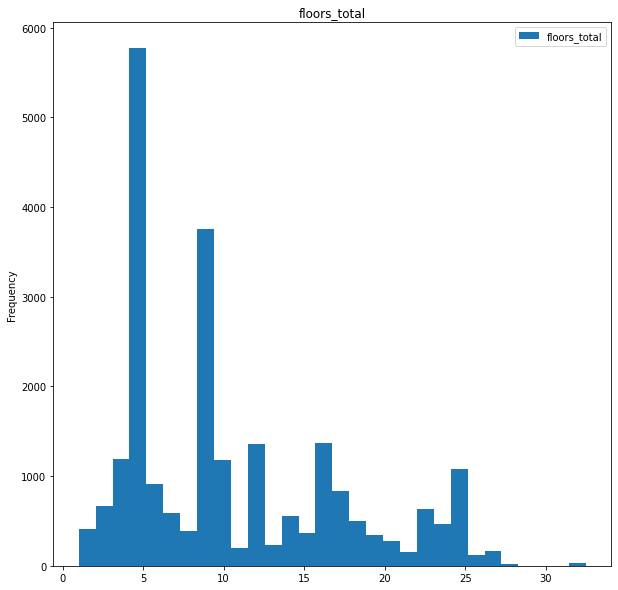

In [64]:
name = 'floors_total'
data.plot(kind='hist', y=name, bins = 30, title=name, figsize=(10,10))

Как было замечено в прошлом пункте очень много квартир расположено в 5, 9 этажных домах.

Но по графику еще видно, что пики есть на отметках 16 и 25. Такие дома, это дома новой застройки, количесвто которых постоянно растет. Поэтому на этих отметках тоже имеются пики

**cityCenters_nearest**

<AxesSubplot:title={'center':'cityCenters_nearest'}, ylabel='Frequency'>

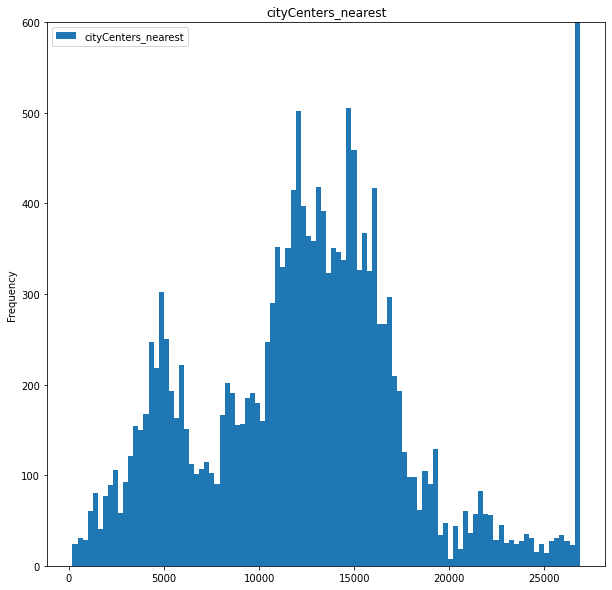

In [65]:
name = 'cityCenters_nearest'
data.plot(kind='hist', y=name, bins = 100, title=name, figsize=(10,10), ylim = (0,600))

На графике видно, что имеется 3 явных вершины. 5к, 12.5к, 16к метров. Сложно конкретно о чем-то утверждать, возможно это связано с тем, что зачастую центр городов, это застройка старой школы, владельцы таких квартир вряд ли часто ее меняют, а цены за такие предложения должны быть высокими, поэтому и выставляют такие предложения на продажу редко. 5км, это возможно как раз окраина центра, где начинается уже современная застрока в большом количестве.

Пики 12.5к и 16к возможно связаны с тем, что у большинства городов, все что близко к центру уже занято и новые жк строят на окраинах.

**airports_nearest**

<AxesSubplot:title={'center':'airports_nearest'}, ylabel='Frequency'>

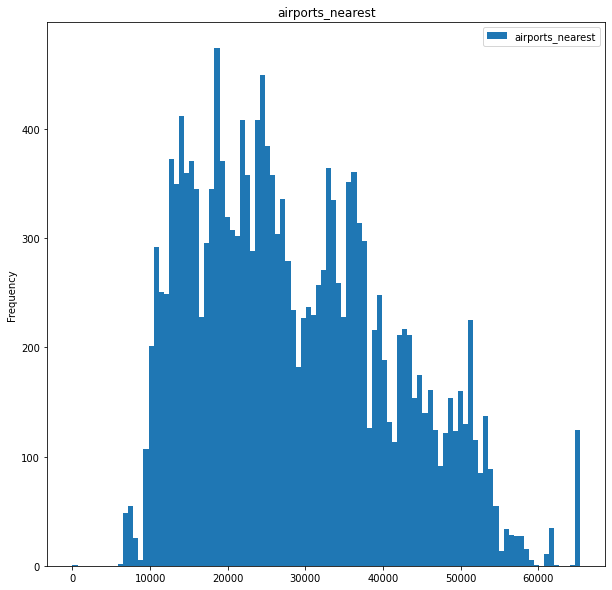

In [66]:
name = 'airports_nearest'
data.plot(kind='hist', y=name, bins = 100, title=name, figsize=(10,10))

Сложно что-то сказать и выделить. большое скопление на расстоянии 10к-40к, что можно назвать болшим интервалом.

кроме того, виден провал, где уроме парочки квартир нет никаких предложений, это 0-10к. это связано с тем, что аэропорты часто строят далеко за пределами города, поэтому и такая пропасть.

**parks_nearest**

<AxesSubplot:title={'center':'parks_nearest'}, ylabel='Frequency'>

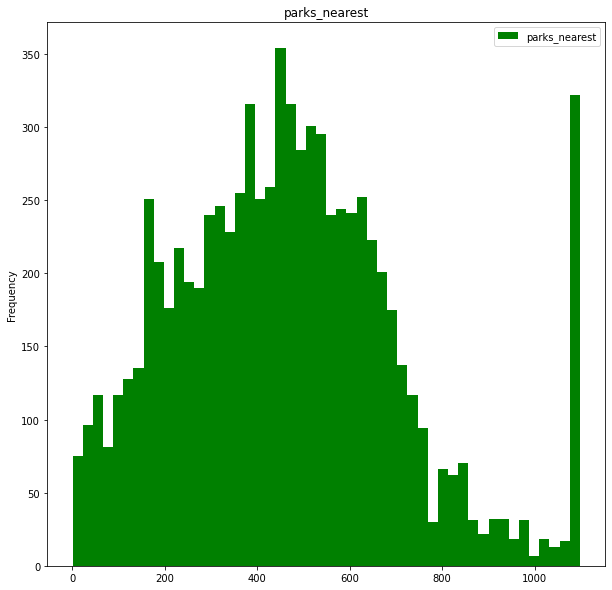

In [67]:
name = 'parks_nearest'
data.plot(kind='hist', y=name, bins = 50, title=name, figsize=(10,10),color='green')

Парки ограничиваются расстоянием 3км, поэтому большого расстоятни нет.

Обычно ближайшие парки находятся на расстоянии 500м, что достаточно приятный факт, так как у всех в шаговой доступности есть парк для прогулок и отдыха.

**weekday**

<AxesSubplot:title={'center':'weekday'}, ylabel='Frequency'>

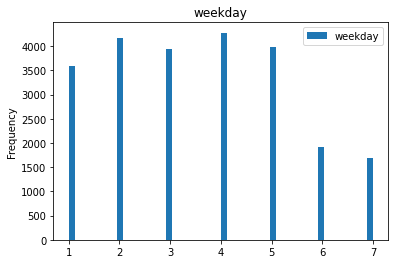

In [68]:
name = 'weekday'
data.plot(kind='hist', y=name, bins = 50, title=name)

В рабочие дни чаще выкладывают объявления, чем в выходные. Достаточно интересно, логично, что должно быть наоборот. Люди на выходных должны заниматься этим, когда у них много свободного времени, но видимо, люди не совсем добросовестно выполняют свою работу, поэтому находят время сделать это во время рабочего дня))))  вряд ли они занимаются этим после тркдного рабочего дня

**month**

<AxesSubplot:title={'center':'month'}, ylabel='Frequency'>

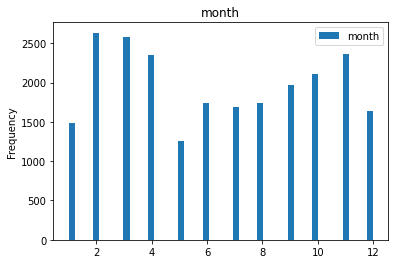

In [69]:
name = 'month'
data.plot(kind='hist', y=name, bins = 50, title=name)

на Январских(1) люди отходят от празднования нового года, а начиная с майских(5) и до августа(8) люди отдыхают, а после этого начинают наращивать темпы выкладывания квартир на продажу 

может это связано с тем что цены падают или подскакивают, проверим

<AxesSubplot:xlabel='month'>

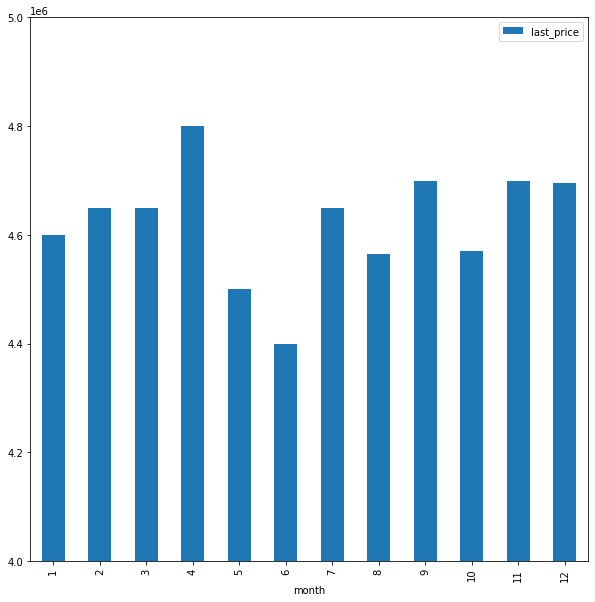

In [70]:
(
    data
    .pivot_table(
        index='month', 
        values='last_price', 
        aggfunc=('median')
    )
    .plot(kind='bar',
          y='last_price', 
          ylim=(4000000,5000000),
          figsize=(10,10)
    )
)


Интересно, что цена максимальная в апрель, когда выставление наоборот затухает, кроме того, можно заметить, что цены в января ниже, возможно поэтому количество и падает, а можеи и наоборот(хотя это было бы странным, потому что когда падает предложение, должны увеличиваться цены, так как не удовлетворяются потребности спроса))

In [71]:
# for col in needed_cols:
#     data.plot(kind='hist',y=col,bins=50,title=col)


Сначала хотел схитрить и автоматизировать построение графика, но к сожалению так тяжело понять какой текст относится к какому графику, поэтому от этой идеи пришлось избавиться

**Выводы по признакам:** 
Выводов не будет, все с признаками хорошо

#### как быстро продавались квартиры 

<AxesSubplot:ylabel='Frequency'>

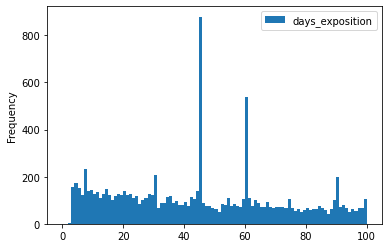

In [72]:
data.plot(kind='hist', y='days_exposition', bins=100, range=(0,100))

При ближайшем рассмотрении оказалось, что значения 45 и 60 очень сильно выделяются на фоне остальных в 4 и 3 раза соответственно. 

Очень похоже на аномалию, почему именно эти значения так сильно выделяются не совсем понятно

In [73]:
data['days_exposition'].max()

510.0

Не будем учитывать наше странное количество на верхней границе, которое мы сами создали, поэтому зададим ограничение):

In [74]:

data.loc[data['days_exposition']<510, 'days_exposition'].agg(('median','mean'))

median     85.000000
mean      128.262131
Name: days_exposition, dtype: float64

In [75]:
data.loc[data['days_exposition']<510, 'days_exposition'].mode()

0    45.0
dtype: float64

In [76]:
data.loc[data['days_exposition']<510, 'days_exposition'].describe()

count    18712.000000
mean       128.262131
std        121.023052
min          1.000000
25%         41.000000
50%         85.000000
75%        182.000000
max        509.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

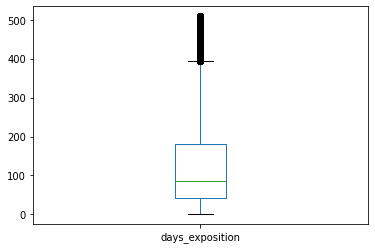

In [77]:
data.loc[data['days_exposition']<510, 'days_exposition'].plot(kind='box')

Быстрой продажей можно назвать первый квантиль, а долгой - последний. Получается, что продажа за 40 дней является быстрой, а после 182 дней - долгой.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [78]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_meter', 'weekday',
       'month', 'year', 'type_floor', 'cityCenters_km'],
      dtype='object')

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

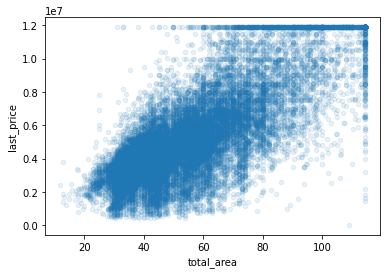

In [79]:
data.plot(kind='scatter', y = 'last_price', x='total_area', alpha=0.1
         )

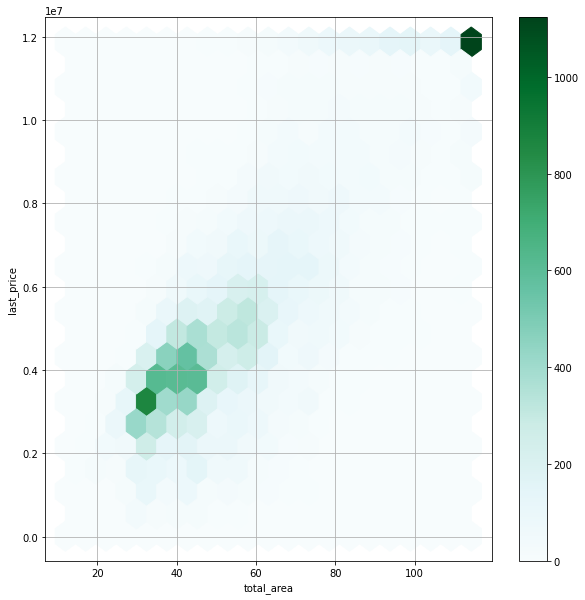

In [80]:
# посмотрим будет ли удобней отслеживать зависимость на хексбине
data.plot(kind='hexbin', 
          y = 'last_price', 
          x='total_area',
          figsize=(10,10),
          gridsize=20, # аналог bins в hist, по сути задает размер клеточек
          sharex=False,# костыль без которого пропает название оси x
          grid=True);

In [81]:
#name = 'total_area'
#data.pivot_table(index=name, values='last_price', aggfunc=('median')).plot(y='last_price',figsize=(10,10),ylim=(0,13000000))
# перепробовал много вариантов, хист не то отображает, а остальные не получается подогнать под сводную таблицу, а обычный линейный довольно хорошо отображает зависимость

In [82]:
# сильная положительная линейная зависимотсь
data['total_area'].corr(data['last_price'])

0.8114020176034986

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

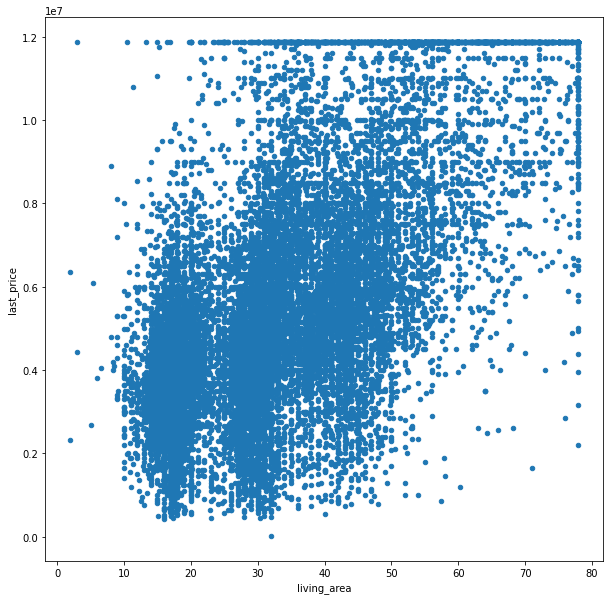

In [83]:
name = 'living_area'
#data.pivot_table(index=name, values='last_price', aggfunc=('median')).plot(y='last_price',figsize=(10,10),ylim=(0,13000000))
data.plot(kind='scatter',y='last_price',x=name,figsize=(10,10))

In [84]:
# сильная положительная линейная зависимотсь
data[name].corr(data['last_price'])

0.708632427179657

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

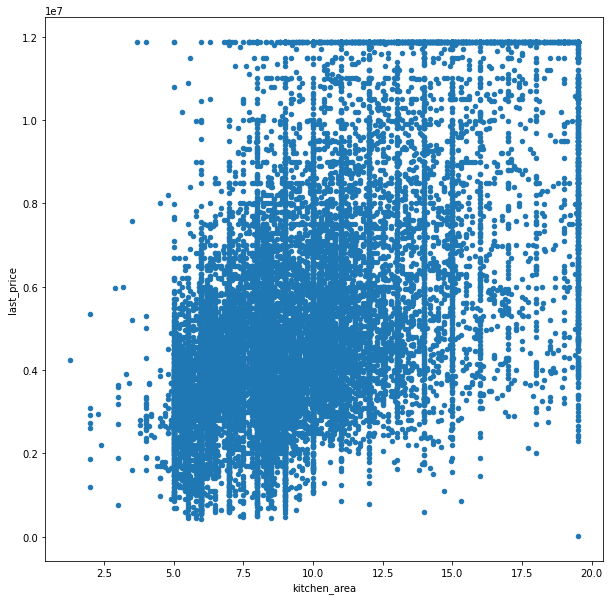

In [85]:
name = 'kitchen_area'
# data.pivot_table(index=name, values='last_price', aggfunc=('median')).plot(y='last_price',figsize=(10,10),ylim=(0,13000000))
data.plot(kind='scatter',y='last_price',x=name,figsize=(10,10))

In [86]:
# "хорошая"(в прошлых была сильнее) положительная линейная зависимотсь
data[name].corr(data['last_price'])

0.6407432828654371

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

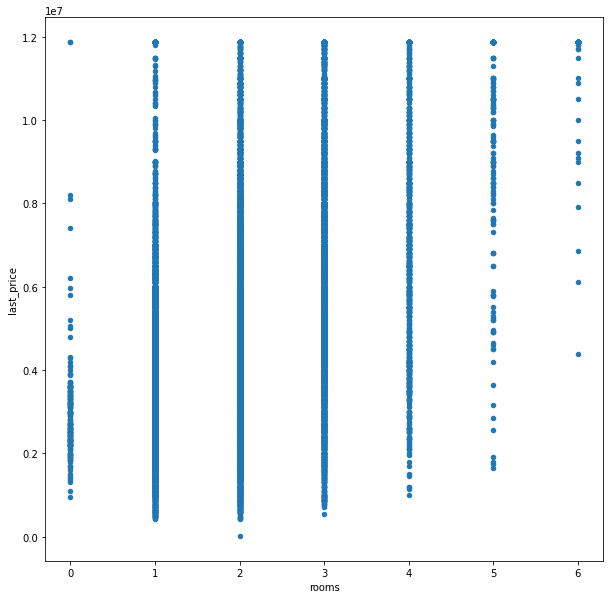

In [87]:
name = 'rooms'
# data.pivot_table(index=name, values='last_price', aggfunc=('median')).plot(y='last_price',figsize=(10,10),ylim=(0,13000000))
data.plot(kind='scatter',y='last_price',x=name,figsize=(10,10))

In [88]:
# не особо сильная(средняя) положительная линейная зависимотсь
data[name].corr(data['last_price'])

0.5626941570584731

<AxesSubplot:xlabel='type_floor'>

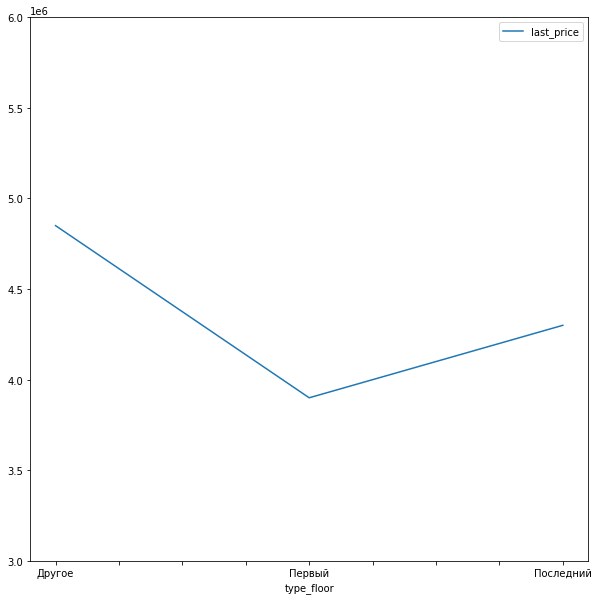

In [89]:
name = 'type_floor'
data.pivot_table(index=name, values='last_price', aggfunc=('median')).plot(y='last_price',figsize=(10,10),ylim=(3000000,6000000))

<AxesSubplot:xlabel='type_floor', ylabel='last_price'>

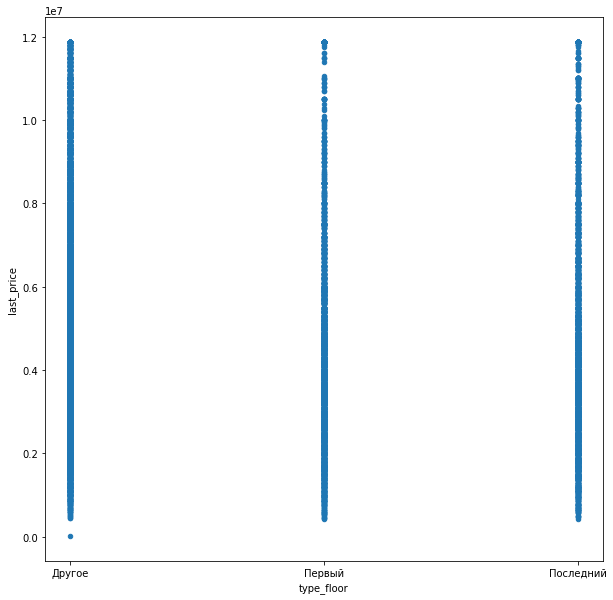

In [90]:
data.plot(kind='scatter',y='last_price',x=name,figsize=(10,10))

Квартиры на первом этаже в среднем дешевле, скорее всего связано с шумом на улице и грязным воздухом из-за машин.

Слышал, что лучшие и оптимальные этажи это 5 и 6, так как воздух не такой грязный, и не слишком высоко, что хорошо в случае каких-то ЧП

<AxesSubplot:xlabel='weekday'>

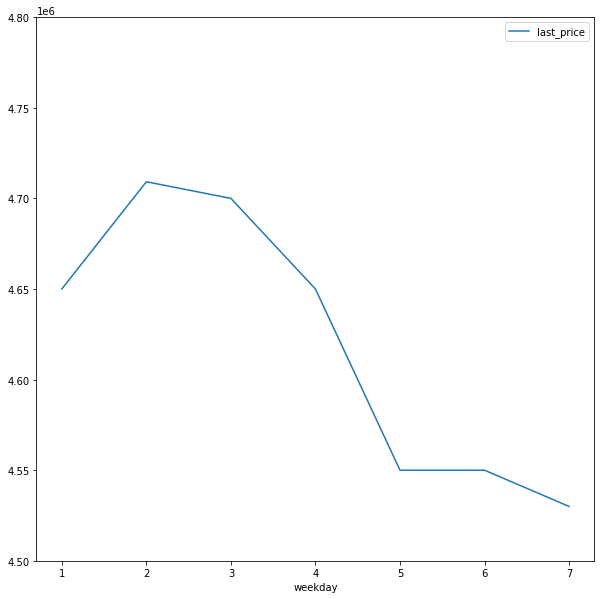

In [91]:
name = 'weekday'
data.pivot_table(index=name, values='last_price', aggfunc=('median')).plot(y='last_price',figsize=(10,10),ylim=(4500000,4800000))

Зависимость не особо прослеживается, +-100к, вообще это много, но это скорее исключения, чем правила.

<AxesSubplot:xlabel='month'>

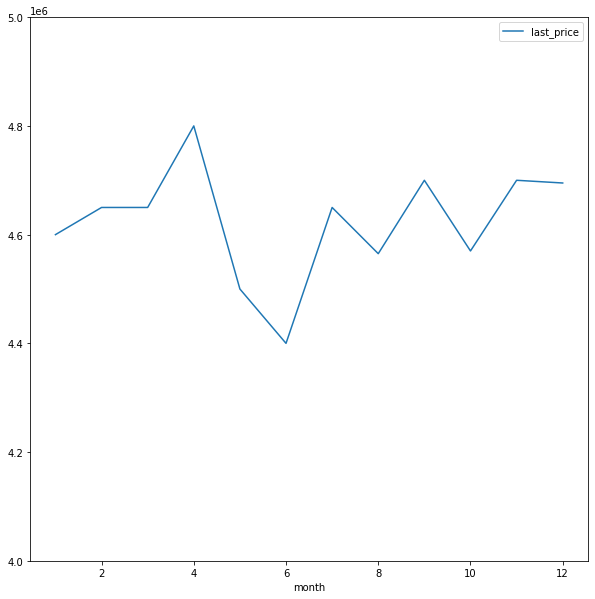

In [92]:
name = 'month'
data.pivot_table(index=name, values='last_price', aggfunc=('median')).plot(y='last_price',figsize=(10,10),ylim=(4000000,5000000))

В июне дешевле всего выставляют квартиры, дешевеют они на 400к, сразу после роста в апреле

<AxesSubplot:xlabel='year'>

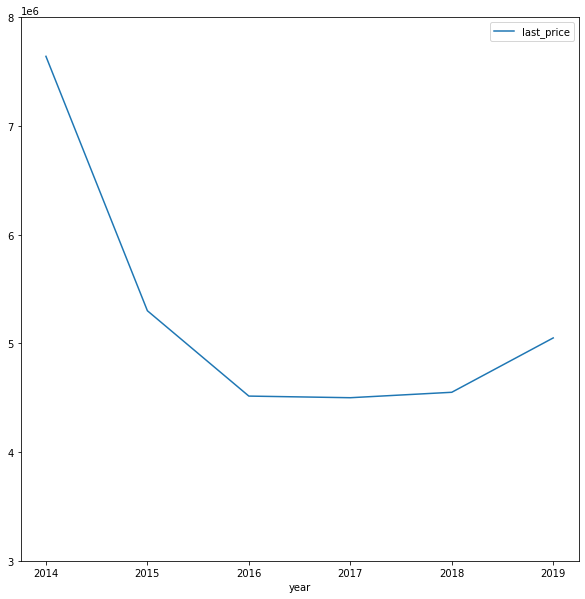

In [93]:
name = 'year'
data.pivot_table(index=name, values='last_price', aggfunc=('median')).plot(y='last_price',figsize=(10,10),ylim=(3000000,8000000))

цены сильно упали после 14 года

<AxesSubplot:xlabel='year'>

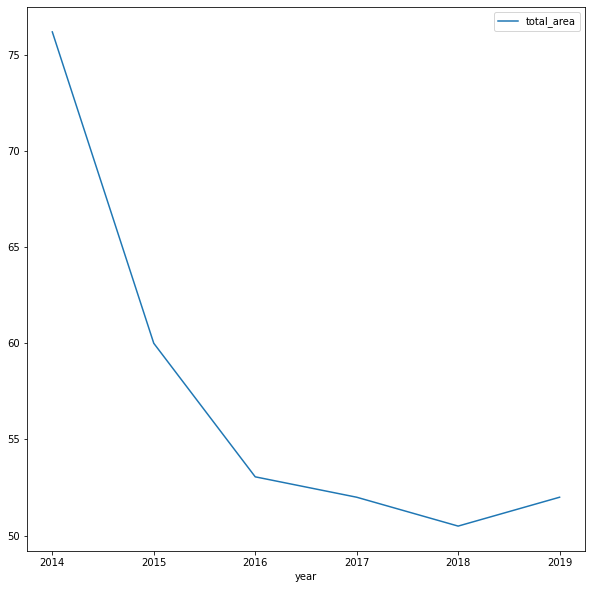

In [95]:
data.pivot_table(index=name, values='total_area', aggfunc=('median')).plot(y='total_area',figsize=(10,10))

Действительно, с 2014 года сильно упала средняя площадь выкладываемых квартир, что говорит о том, что упала не столько финальная цена, а общая площадь квартир.

Для корректной оценки изменения цен можно сравнить не итоговые стоимости, а средние цены за квадратный метр

<AxesSubplot:xlabel='year'>

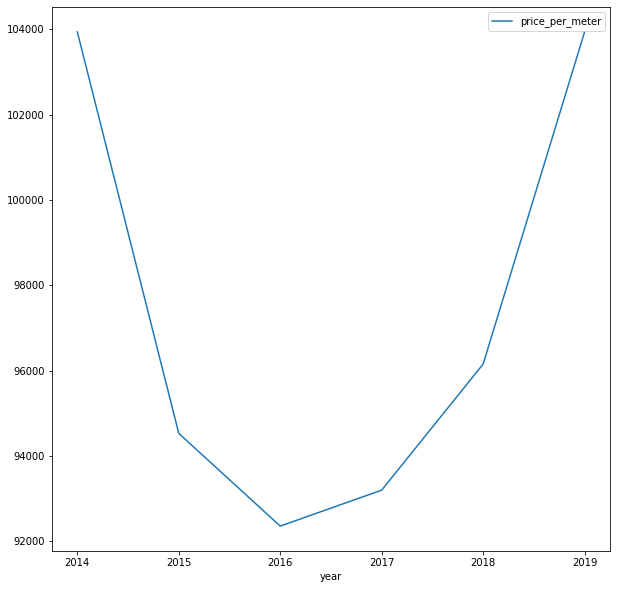

In [96]:
data.pivot_table(index=name, values='price_per_meter', aggfunc=('median')).plot(y='price_per_meter',figsize=(10,10))

Видим, что цена за квадратный метр сначала упала, но к 2019 году она обратно поднялась к пержним значениям

**Вывод:** если рассматривать каждый признак отдельно, то по цифрам и графику больше всего на общую стоимость влияет общая площадь квартиры, и, чуть-чуть меншье, жилая площадь. Но нельзя рассматривать влияния каждого признака отдельно, потому что комбинации этих признаков могут иметь более высокое влияение.


#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделяем населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [97]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_meter', 'weekday',
       'month', 'year', 'type_floor', 'cityCenters_km'],
      dtype='object')

In [98]:
df = data.pivot_table(index='locality_name', values=['price_per_meter'], aggfunc=('count','mean'))
df.columns = ['count', 'mean_price']
df = df.sort_values(by='count', ascending=False).head(10)
df

,count,mean_price
locality_name,,
Санкт-Петербург,15643,107165.274930
посёлок Мурино,552,85629.568641
посёлок Шушары,439,78585.392847
Всеволожск,398,67907.917538
Пушкин,369,101205.063659
Колпино,338,75413.345385
посёлок Парголово,327,90267.474709
Гатчина,307,68779.668241
деревня Кудрово,299,92448.284849


<AxesSubplot:title={'center':'Зависимость цены за квадратный метр и популярности города по количеству выложенных объявлений'}, xlabel='count', ylabel='mean_price'>

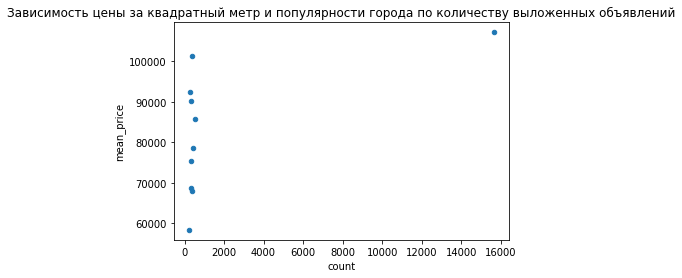

In [99]:
df.plot(kind='scatter', x='count',y='mean_price',title='Зависимость цены за квадратный метр и популярности города по количеству выложенных объявлений')

<AxesSubplot:title={'center':'Зависимость цены за квадратный метр и популярности города по количеству выложенных объявлений'}, xlabel='locality_name'>

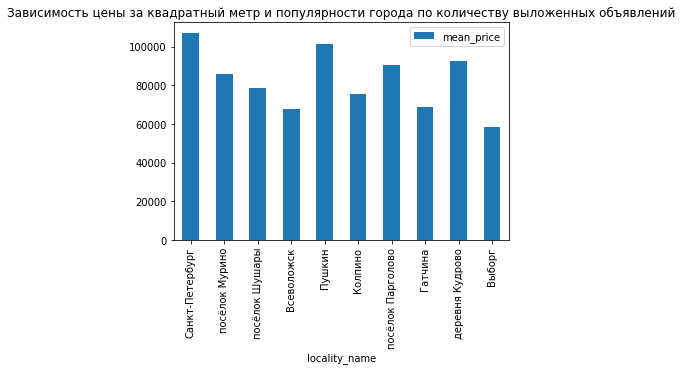

In [100]:
df.plot(kind='bar',y='mean_price',title='Зависимость цены за квадратный метр и популярности города по количеству выложенных объявлений')

Явно видим, что у 2-10 мест количество объявление слабо отличается, количество лежит в интервале 250-500. На их фоне выделяется Санкт-Петербург, которы имеет 16000 объявлений, ого!

Изучим зависимость, что видим, что первые 4 места действительно имеют зависимость цены и количества отзывов, но 5 место (пушкин) имеет цену почти как у 1 места(Санкт-Петербурга), далее нет особой зависимости(ну только что нечетные города после Пушкина, имеют одинаковую среднюю цену за квадратный метр)

Самая высокая стоимость в Санкт-Петербурге, самая низкая в Выборге

#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [101]:
# так как требуется посмотреть город только Санкт-Петербург - отфильруем его

df = data.loc[data['locality_name'] == 'Санкт-Петербург']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,type_floor,cityCenters_km
0,20.0,11875000.0,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,True,...,482.0,2.0,755.0,NaN,109953.70,4,3,2019,Другое,16.0
2,10.0,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4.0,True,...,90.0,2.0,574.0,510.0,92785.71,4,8,2015,Другое,13.0
3,0.0,11875000.0,114.25,2015-07-24,3.0,2.65,14.0,NaN,9.0,True,...,84.0,2.5,234.0,424.0,103938.73,5,7,2015,Другое,6.0
4,2.0,10000000.0,100.00,2018-06-19,2.0,2.85,14.0,32.0,13.0,True,...,112.0,1.0,48.0,121.0,100000.00,2,6,2018,Другое,8.0
7,5.0,7915000.0,71.60,2019-04-18,2.0,2.65,24.0,NaN,17.0,True,...,NaN,0.0,NaN,NaN,110544.69,4,4,2019,Другое,11.0


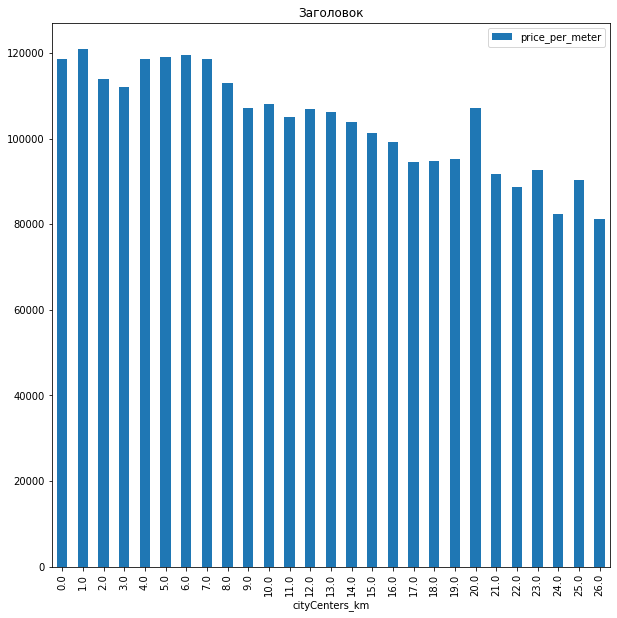

In [102]:
# выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену для каждого километра.

df = (
    df
      .pivot_table(index='cityCenters_km', values='price_per_meter', aggfunc='mean')
      .plot(kind='bar', y='price_per_meter', figsize=(10,10), title = 'Заголовок')
     )

В зависимости от расстояния средние цены за квадратный метр падают, но есть и некоторые выбивающиеся значения из общей картины, напрмер, 4-7 км , 20км, 23км и 25км. Но в общем видим убывающий тренд, то есть цены с увеличением расстояния падают, ближайшие и дальнейшие квартиры отличаются по цене на целых 40к, что составляет 30% от цен в питере!!!!.

### Общий вывод

За время выполнения были выполнены требуемые задачи, предобработаны данные, приведы к корректному виду, добавлены новые признаки, проведена исследовательская работа

**Проделанная работа**
Предобработка прошла в несколько этапов:
- Обработали пропуски
- Поменяли неуместные типы данных на более удобные и правильные
- Убрали явные и неявные дубликаты
- Устранили выбросы путем замены на граничные допустимые значения

Добавление несколько новых признаков(столбцов), в их числе:
- Цена квадратного метра
- День недели выставления объявления
- Месяц выставления объявления
- Год выставления объявления
- Тип этажа квартиры
- Расстояние до центра в км

Исследовательский анализ состоял из нескольких основных пунктов:
- Изучение параметров и зависимостей в количественных признаках
- Факторы влияния на общую цену квартиры
- Изучение средней цены квадратного метра в топ-10 городах Ленинградской области по количеству размещенных объявлений
- Средние цены за квадратный метр в зависимости от удаления от Санкт-Петербурга

**Общие выводы исследования: **
1) Быстрой продажей квартиры можно назвать случай продажи за 40 и меньше считая от выставления объявления. Долгой продаей считается ожидание продажей более 180 дней.
2) Больше всего на итоговую стоимость квартиры влияет параметр "общая площадь", на втором месте по оказываемому влиянию находится "жилая площадь", на третьем месте параметр "площадь кухни". Но важно обратить внимание на тот факт, что нельзя рассматривать какой-то параметр абстрагированно, на общую стоимость немалое влияние оказывает каждый параметр.
3) Средняя цена квадратного метра может отличаться в пределах Ленинградской области на 30%, что очень большой показатель, самыми дорогими оказались населенные пункты: Санкт-Петербург и Пушкин.
4) Изучение зависимости цены от расстояния до центра Санкт-Петербурга показало, что цены в пределах 7км, отличаются незначительно или не отличаются совсем.

**Рекомендации:**
- На цену влияют очень многие параметры и нельзя учитывать в модели только один какой-то или несколько.
- Предоставленные данные являются репрезентативной выборкой на основе которой можно сделать выводы о формировании цены на рынке. 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод